In [ ]:
!pip install warnings
!pip install seaborn
!pip install matplotlib
!pip install  ydata_profiling

/opt/conda/lib/python3.10/site-packages/numba/core/decorators.py:262: NumbaDeprecationWarning: numba.generated_jit is deprecated. Please see the documentation at: https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-generated-jit for more information and advice on a suitable replacement.
  warnings.warn(msg, NumbaDeprecationWarning)
/opt/conda/lib/python3.10/site-packages/visions/backends/shared/nan_handling.py:51: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  def hasna(x: np.ndarray) -> bool:


/kaggle/input/data-desc/.pdf
/kaggle/input/holidays/holidays_covid_calendar.csv
/kaggle/input/lenta-hack/pr_df.csv
/kaggle/input/lenta-hack/sales_df_train.csv
/kaggle/input/lenta-hack/sales_submission.csv
/kaggle/input/lenta-hack/.pdf
/kaggle/input/lenta-hack/st_df.csv


In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from ydata_profiling import ProfileReport
import matplotlib.pyplot as plt
import seaborn as sns
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory
import warnings

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [ ]:
warnings.filterwarnings("ignore")

In [ ]:
def wape(y_true: np.array, y_pred: np.array):
    return np.sum(np.abs(y_true-y_pred))/np.sum(np.abs(y_true))


# EDA

## Данные по товарной иерархии

In [ ]:
def pie_chart_2_var(df,column):
    sales_type_counts = df[column].value_counts()

    plt.figure(figsize=(10, 6))
    plt.pie(sales_type_counts, labels=sales_type_counts.index, autopct='%1.1f%%', startangle=140)
    plt.title(f'Отношение по {column}')

    plt.show()

In [ ]:
pr_df = pd.read_csv('/kaggle/input/lenta-hack/pr_df.csv')

In [ ]:
pr_df.head(3)

pr_sku_id                       pr_group_id  \
0  fd064933250b0bfe4f926b867b0a5ec8  c74d97b01eae257e44aa9d5bade97baf   
1  71c9661741caf40a92a32d1cc8206c04  c74d97b01eae257e44aa9d5bade97baf   
2  00b72c2f01a1512cbb1d3f33319bac93  c74d97b01eae257e44aa9d5bade97baf   

                          pr_cat_id                      pr_subcat_id  \
0  1bc0249a6412ef49b07fe6f62e6dc8de  ca34f669ae367c87f0e75dcae0f61ee5   
1  c559da2ba967eb820766939a658022c8  e06f5ed77191826c212c30722f2cc5a2   
2  1bc0249a6412ef49b07fe6f62e6dc8de  d407a3ebb4ab9b0d68b224486f8b8dad   

   pr_uom_id  
0         17  
1         17  
2         17

In [ ]:
pr_df

pr_sku_id                       pr_group_id  \
0     fd064933250b0bfe4f926b867b0a5ec8  c74d97b01eae257e44aa9d5bade97baf   
1     71c9661741caf40a92a32d1cc8206c04  c74d97b01eae257e44aa9d5bade97baf   
2     00b72c2f01a1512cbb1d3f33319bac93  c74d97b01eae257e44aa9d5bade97baf   
3     9bc40cd2fe4f188f402bb41548c5e15c  c74d97b01eae257e44aa9d5bade97baf   
4     3a74a370c8eb032acb11ad9119242b8f  c74d97b01eae257e44aa9d5bade97baf   
...                                ...                               ...   
2045  2c3b895d9fccc33226fee2c521618893  c74d97b01eae257e44aa9d5bade97baf   
2046  6058d6b7d1f04803d15d1896d3256c92  6512bd43d9caa6e02c990b0a82652dca   
2047  3beeab85046ca201d73bb9d129bcfc3f  c74d97b01eae257e44aa9d5bade97baf   
2048  b9e2f33d70ffb02d6d04f470da2e45c9  aab3238922bcc25a6f606eb525ffdc56   
2049  dbfce512dcdabc6b6e2724b6ec44efda  c51ce410c124a10e0db5e4b97fc2af39   

                             pr_cat_id                      pr_subcat_id  \
0     1bc0249a6412ef49b07fe6f62e6dc8de  ca34f669ae367c87f0e75dcae0f61ee5   
1     c559da2ba967eb820766939a658022c8  e06f5ed77191826c212c30722f2cc5a2   
2     1bc0249a6412ef49b07fe6f62e6dc8de  d407a3ebb4ab9b0d68b224486f8b8dad   
3     1bc0249a6412ef49b07fe6f62e6dc8de  ca34f669ae367c87f0e75dcae0f61ee5   
4     c559da2ba967eb820766939a658022c8  e06f5ed77191826c212c30722f2cc5a2   
...                                ...                               ...   
2045  a2cc63e065705fe938a4dda49092966f  4589b8f516d28558b3850c37776cadc8   
2046  e58cc5ca94270acaceed13bc82dfedf7  c0a667df8f0d6ee98dda972b0870fabf   
2047  c559da2ba967eb820766939a658022c8  34d2777e78ccf007523e2dd1fcea6b2d   
2048  3de2334a314a7a72721f1f74a6cb4cee  0f3abfd67959c079e7b3759440e7415c   
2049  535ab76633d94208236a2e829ea6d888  62a415ea2b60a33b87aa005cb9c4e9ff   

      pr_uom_id  
0            17  
1            17  
2            17  
3            17  
4            17  
...         ...  
2045          1  
2046          1  
2047         17  
2048         17  
2049          1  

[2050 rows x 5 columns]

In [ ]:
ProfileReport(pr_df)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [ ]:
def plot_categorical_histplot(data, column_name, colour_hist, custom_bins=10):
    """
    Выводит histplot-график с гистограммой и KDE для категориального признака.

    :param data: DataFrame содержащий данные
    :param column_name: Название столбца с категориальным признаком
    :param custom_bins: Список значений для деления данных на интервалы
    """
    plt.figure(figsize=(10, 6))
    sns.set(style="darkgrid")

    sns.histplot(data=data, bins=custom_bins, x=column_name, color=colour_hist, kde=True)

    plt.title(f'Распределение для {column_name}')
    plt.xlabel(column_name)
    plt.ylabel('Частота')
    plt.xticks(rotation=90)
    plt.show()

In [ ]:
pr_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2050 entries, 0 to 2049
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   pr_sku_id     2050 non-null   object
 1   pr_group_id   2050 non-null   object
 2   pr_cat_id     2050 non-null   object
 3   pr_subcat_id  2050 non-null   object
 4   pr_uom_id     2050 non-null   int64 
dtypes: int64(1), object(4)
memory usage: 80.2+ KB


In [ ]:
colour_schemes = {
    0: ["#FF6B6B", "#FFD166"],  # Мягко-красный и мягко-желтый
    1: ["#FF9A8B", "#A4E57E"],  # Мягко-оранжевый и мягко-зеленый
    2: ["#6A0572", "#FFE34D"],  # Мягко-фиолетовый и мягко-желтый
    3: ["#7BDFF2", "#F19CBB"],  # Голубой и светло-розовый
    4: ["#F77F00", "#D62828"],  # Мягко-оранжевый и мягко-красный
    5: ["#457B9D", "#F4A261"],  # Синий и оранжевый
    6: ["#48466D", "#6A0572"],  # Темно-фиолетовый и фиолетовый
    7: ["#94B0DA", "#F2D7EE"],  # Светло-серый и светло-розовый
    8: ["#F76D57", "#F1FAEE"],  # Мягко-красный и белый
    9: ["#F9AA33", "#4CAF50"],  # Желтый и зеленый
    10: ["#264653", "#E76F51"],  # Темно-синий и мягко-красный
    11: ["#00A6A6", "#F8B195"],  # Темно-зеленый и светло-персиковый
    12: ["#FFB5A7", "#AEC3B0"],  # Светло-розовый и светло-зеленый
    13: ["#0081A7", "#F07167"],  # Темно-синий и мягко-красный
    14: ["#0081A7", "#E36157"],  # Темно-синий и темно-красный
}


In [ ]:
pr_df_hist_list = list(pr_df.columns)

In [ ]:
pr_df_hist_list.pop(0)

'pr_sku_id'

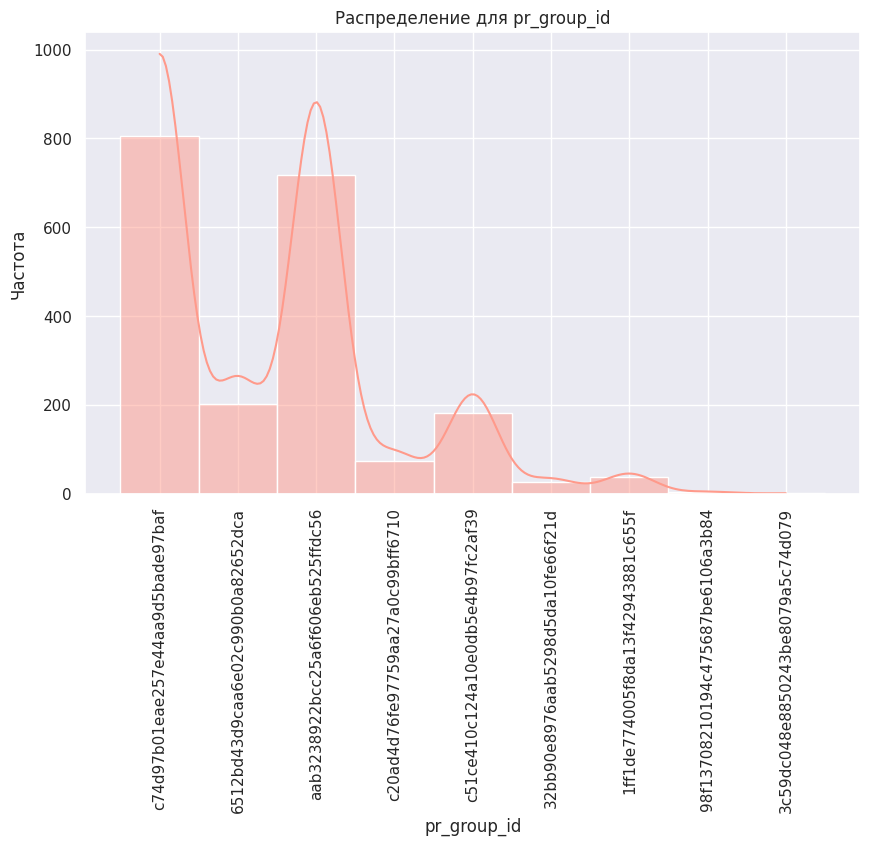

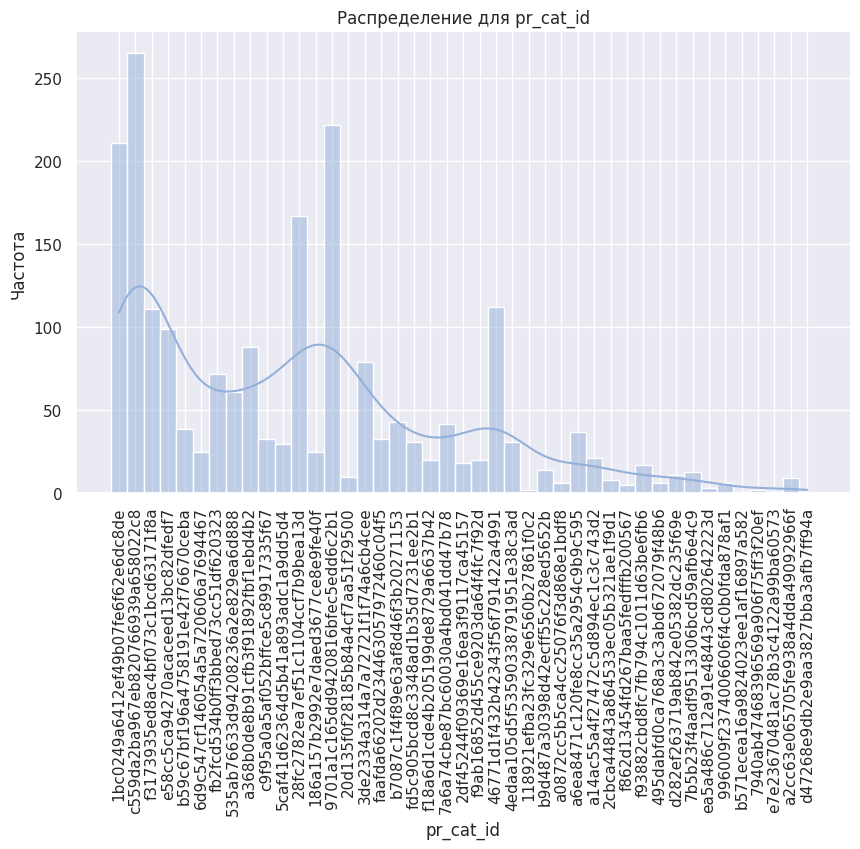

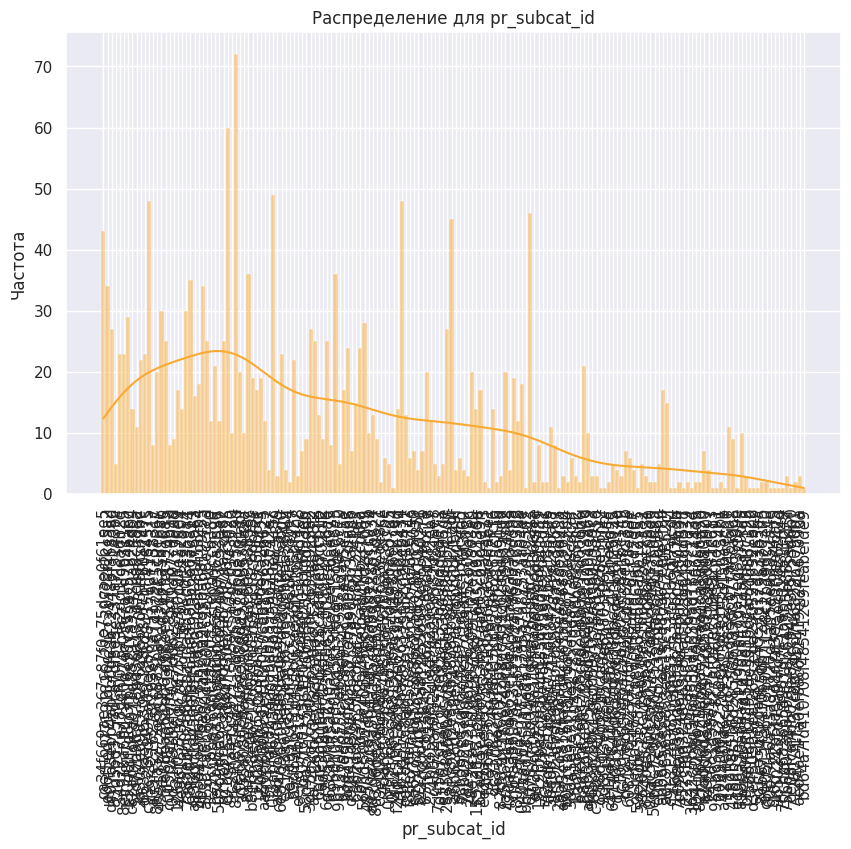

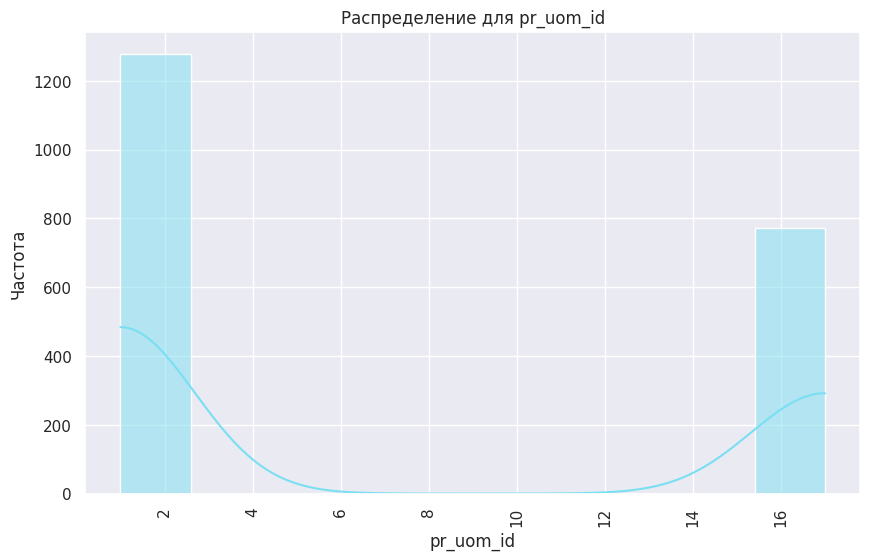

In [ ]:
for i in pr_df_hist_list:
    random_number = np.random.randint(0, 15)
    plot_categorical_histplot(pr_df,i,colour_schemes[random_number][0])

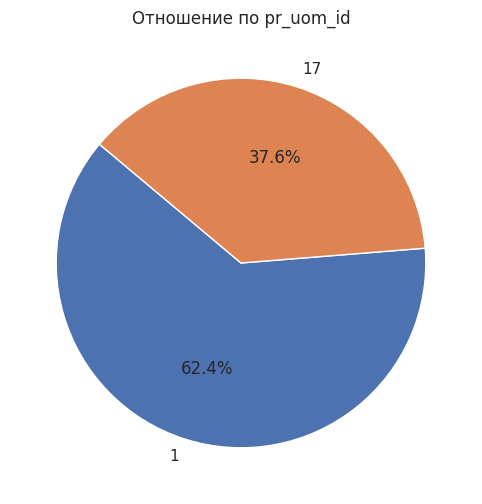

In [ ]:
pie_chart_2_var(pr_df,'pr_uom_id')

## Данные товарной иерархии (pr_df)
В таблице о данных товарной иерархии
Анализ столбцов:
* pr_sku_id - собрано 2050 уникальный продуктов.
* pr_group_id - всего уникальных групп товаров – 9 шт.
* pr_cat_id – всего уникальных категорий товаров – 43 шт.
* pr_subcat_id – всего уникальных подкатегорий товар – 170 шт.
* pr_uom_id – 2 уникальных значения – продажа по весу или штучно.
    * 1 – 1279
    * 17 – 771 ? Что за что отвечает. Что вес что штука
    
Видно, что товар, продающие по [Весу] больше

Категориальные признаки распределены неравномерно (см. Графики):
* «Распределения для pr_group_id»
* «Распределения для pr_cat_id»
* «Распределения для pr_subcat_id»





Пропущенные значения:
* Прощенные значения отсутствуют.  


## Данные по продажам за скользящий год для обучения

In [ ]:
sales_df_train = pd.read_csv('/kaggle/input/lenta-hack/sales_df_train.csv')

In [ ]:
sales_df_train.head()

st_id                         pr_sku_id  \
0  c81e728d9d4c2f636f067f89cc14862c  c7b711619071c92bef604c7ad68380dd   
1  42a0e188f5033bc65bf8d78622277c4e  68f441429e73dbd33b81f95da31576e9   
2  1ecfb463472ec9115b10c292ef8bc986  22988026fe85fde60d8bf777ab6bc3b4   
3  42a0e188f5033bc65bf8d78622277c4e  8e887cf8e64ab8e7173701a979476567   
4  16a5cdae362b8d27a1d8f8c7b78b4330  e6fc24ca846339d204b0b50e9f772484   

         date  pr_sales_type_id  pr_sales_in_units  pr_promo_sales_in_units  \
0  2022-10-20                 1                5.0                      5.0   
1  2023-01-29                 0                4.0                      0.0   
2  2023-03-02                 0                1.0                      0.0   
3  2023-04-05                 1                0.0                      0.0   
4  2023-02-17                 0                1.0                      0.0   

   pr_sales_in_rub  pr_promo_sales_in_rub  
0            825.0                  825.0  
1            196.0                    0.0  
2             78.0                    0.0  
3             69.0                   69.0  
4            161.0                    0.0

In [ ]:
sales_df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 883015 entries, 0 to 883014
Data columns (total 8 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   st_id                    883015 non-null  object 
 1   pr_sku_id                883015 non-null  object 
 2   date                     883015 non-null  object 
 3   pr_sales_type_id         883015 non-null  int64  
 4   pr_sales_in_units        883015 non-null  float64
 5   pr_promo_sales_in_units  883015 non-null  float64
 6   pr_sales_in_rub          883015 non-null  float64
 7   pr_promo_sales_in_rub    883015 non-null  float64
dtypes: float64(4), int64(1), object(3)
memory usage: 53.9+ MB


In [ ]:
def grab_float_columns(df):
    return list(df.select_dtypes(include='float').columns)

In [ ]:
float_columns = grab_float_columns(sales_df_train)

In [ ]:
float_columns

['pr_sales_in_units',
 'pr_promo_sales_in_units',
 'pr_sales_in_rub',
 'pr_promo_sales_in_rub']

In [ ]:
def check_nonzero_decimal(row):
    decimal_part = row - int(row)
    if decimal_part != 0:
        raise StopIteration  # Выбрасываем исключение для завершения apply



In [ ]:
lst=[]

In [ ]:
for i in float_columns:
    try:
        sales_df_train[i].apply(check_nonzero_decimal)
        lst.append(i)
    except StopIteration:
        print(F'В колонке {i} есть как минимум одно число, у которого после запятой есть цифра отличная от нуля! ')

**Вывод:**

* Можем для экономии памяти перевести из `float` типа в `int`

In [ ]:
for i in float_columns:
    sales_df_train[i] = sales_df_train[i].astype('int')

In [ ]:
sales_df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 883015 entries, 0 to 883014
Data columns (total 8 columns):
 #   Column                   Non-Null Count   Dtype 
---  ------                   --------------   ----- 
 0   st_id                    883015 non-null  object
 1   pr_sku_id                883015 non-null  object
 2   date                     883015 non-null  object
 3   pr_sales_type_id         883015 non-null  int64 
 4   pr_sales_in_units        883015 non-null  int64 
 5   pr_promo_sales_in_units  883015 non-null  int64 
 6   pr_sales_in_rub          883015 non-null  int64 
 7   pr_promo_sales_in_rub    883015 non-null  int64 
dtypes: int64(5), object(3)
memory usage: 53.9+ MB


In [ ]:
for key,value in sales_df_train.columns.groupby(sales_df_train.dtypes).items():
    print(key,*list(value),len(value))

int64 pr_sales_type_id pr_sales_in_units pr_promo_sales_in_units pr_sales_in_rub pr_promo_sales_in_rub 5
object st_id pr_sku_id date 3


In [ ]:
ProfileReport(sales_df_train)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [ ]:
sales_df_train['pr_sales_type_id'].mean() *100

40.64857335379354

In [ ]:
(1-sales_df_train['pr_sales_type_id'].mean())*100

59.35142664620646

In [ ]:
sales_df_train[~(sales_df_train['pr_promo_sales_in_units'] == sales_df_train['pr_sales_in_units'])].shape

(488794, 8)

In [ ]:
sales_df_train

st_id                         pr_sku_id  \
0       c81e728d9d4c2f636f067f89cc14862c  c7b711619071c92bef604c7ad68380dd   
1       42a0e188f5033bc65bf8d78622277c4e  68f441429e73dbd33b81f95da31576e9   
2       1ecfb463472ec9115b10c292ef8bc986  22988026fe85fde60d8bf777ab6bc3b4   
3       42a0e188f5033bc65bf8d78622277c4e  8e887cf8e64ab8e7173701a979476567   
4       16a5cdae362b8d27a1d8f8c7b78b4330  e6fc24ca846339d204b0b50e9f772484   
...                                  ...                               ...   
883010  c81e728d9d4c2f636f067f89cc14862c  a0150fefa71d6606d5e642fa0e7b8ad8   
883011  42a0e188f5033bc65bf8d78622277c4e  5b146d93f822459260216df28e572eca   
883012  42a0e188f5033bc65bf8d78622277c4e  c8bd18ea08d2f47cb0a7992f11ada9de   
883013  f7e6c85504ce6e82442c770f7c8606f0  b960c6ee5b5efa12e73f810204b561a8   
883014  16a5cdae362b8d27a1d8f8c7b78b4330  cff633e270708ced01bc585eb1421667   

              date  pr_sales_type_id  pr_sales_in_units  \
0       2022-10-20                 1                  5   
1       2023-01-29                 0                  4   
2       2023-03-02                 0                  1   
3       2023-04-05                 1                  0   
4       2023-02-17                 0                  1   
...            ...               ...                ...   
883010  2022-12-13                 1                  1   
883011  2023-04-18                 0                  1   
883012  2022-08-16                 0                  5   
883013  2023-04-23                 0                  4   
883014  2023-01-19                 0                  4   

        pr_promo_sales_in_units  pr_sales_in_rub  pr_promo_sales_in_rub  
0                             5              825                    825  
1                             0              196                      0  
2                             0               78                      0  
3                             0               69                     69  
4                             0              161                      0  
...                         ...              ...                    ...  
883010                        1               33                     33  
883011                        0              192                      0  
883012                        0              970                      0  
883013                        0              262                      0  
883014                        0              225                      0  

[883015 rows x 8 columns]

In [ ]:
sales_df_train

st_id                         pr_sku_id  \
0       c81e728d9d4c2f636f067f89cc14862c  c7b711619071c92bef604c7ad68380dd   
1       42a0e188f5033bc65bf8d78622277c4e  68f441429e73dbd33b81f95da31576e9   
2       1ecfb463472ec9115b10c292ef8bc986  22988026fe85fde60d8bf777ab6bc3b4   
3       42a0e188f5033bc65bf8d78622277c4e  8e887cf8e64ab8e7173701a979476567   
4       16a5cdae362b8d27a1d8f8c7b78b4330  e6fc24ca846339d204b0b50e9f772484   
...                                  ...                               ...   
883010  c81e728d9d4c2f636f067f89cc14862c  a0150fefa71d6606d5e642fa0e7b8ad8   
883011  42a0e188f5033bc65bf8d78622277c4e  5b146d93f822459260216df28e572eca   
883012  42a0e188f5033bc65bf8d78622277c4e  c8bd18ea08d2f47cb0a7992f11ada9de   
883013  f7e6c85504ce6e82442c770f7c8606f0  b960c6ee5b5efa12e73f810204b561a8   
883014  16a5cdae362b8d27a1d8f8c7b78b4330  cff633e270708ced01bc585eb1421667   

              date  pr_sales_type_id  pr_sales_in_units  \
0       2022-10-20                 1                  5   
1       2023-01-29                 0                  4   
2       2023-03-02                 0                  1   
3       2023-04-05                 1                  0   
4       2023-02-17                 0                  1   
...            ...               ...                ...   
883010  2022-12-13                 1                  1   
883011  2023-04-18                 0                  1   
883012  2022-08-16                 0                  5   
883013  2023-04-23                 0                  4   
883014  2023-01-19                 0                  4   

        pr_promo_sales_in_units  pr_sales_in_rub  pr_promo_sales_in_rub  
0                             5              825                    825  
1                             0              196                      0  
2                             0               78                      0  
3                             0               69                     69  
4                             0              161                      0  
...                         ...              ...                    ...  
883010                        1               33                     33  
883011                        0              192                      0  
883012                        0              970                      0  
883013                        0              262                      0  
883014                        0              225                      0  

[883015 rows x 8 columns]

In [ ]:
sales_df_train.shape

(883015, 8)

In [ ]:
sales_df_train['pr_sales_in_units']

0         5
1         4
2         1
3         0
4         1
         ..
883010    1
883011    1
883012    5
883013    4
883014    4
Name: pr_sales_in_units, Length: 883015, dtype: int64

### Кол-во продаж по дням (ниже и выше медианы)

In [ ]:
groupby_ = sales_df_train.groupby(['date']).count()['st_id']

In [ ]:
tmp = sales_df_train.copy()

In [ ]:
groupby_date = tmp.groupby(['date']).count()['st_id']

In [ ]:
groupby_date = groupby_date.reset_index()

In [ ]:
groupby_date['date'] = pd.to_datetime(groupby_date['date'])

In [ ]:
groupby_date.head()

date  st_id
0 2022-08-01   2256
1 2022-08-02   2255
2 2022-08-03   2318
3 2022-08-04   2502
4 2022-08-05   2673

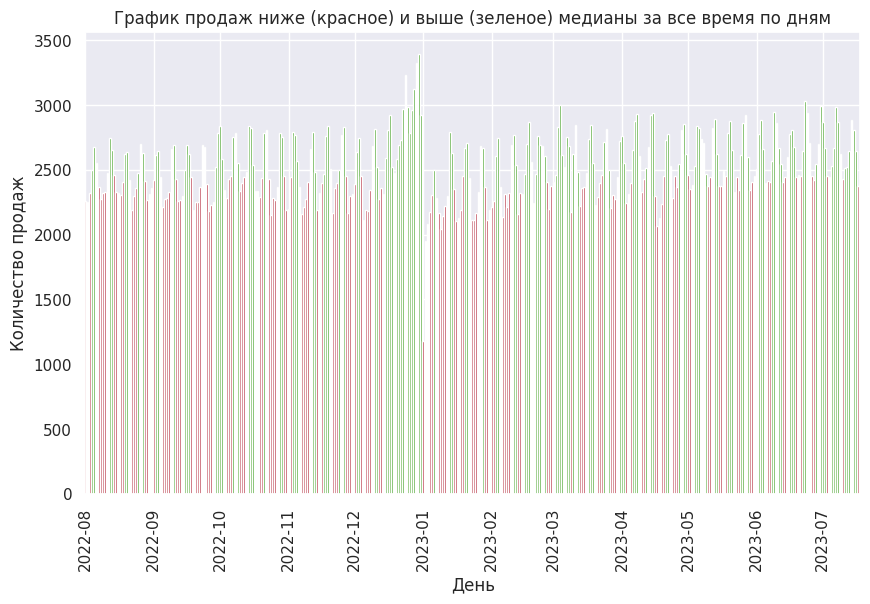

Доля дней с кол-вом продаж ниже медианы 2461.5: 50.00%
Доля дней с кол-вом продаж ниже средней 2508.57: 55.68%


In [ ]:
median_number_of_sales_per_day = groupby_date['st_id'].median()
mean_number_of_sales_per_day = groupby_date['st_id'].mean()

groupby_date['color'] = np.where(groupby_date['st_id'] < median_number_of_sales_per_day, '#B62E40', '#46A229')
min_date = groupby_date['date'].min()
max_date = groupby_date['date'].max()


plt.figure(figsize=(10, 6))
plt.bar(groupby_date['date'], groupby_date['st_id'], color=groupby_date['color'])
plt.xlabel('День')
plt.ylabel('Количество продаж')
plt.title('График продаж ниже (красное) и выше (зеленое) медианы за все время по дням')
plt.xticks(rotation=90)
plt.xlim(min_date, max_date)
plt.show()

low_sales_days_median = groupby_date[groupby_date['st_id'] < median_number_of_sales_per_day]
low_sales_fraction_median = len(low_sales_days_median) / len(groupby_date)
print(f'Доля дней с кол-вом продаж ниже медианы {round(median_number_of_sales_per_day,2)}: {low_sales_fraction_median:.2%}')
low_sales_days_mean = groupby_date[groupby_date['st_id'] < mean_number_of_sales_per_day]
low_sales_fraction_mean = len(low_sales_days_mean) / len(groupby_date)
print(f'Доля дней с кол-вом продаж ниже средней {round(mean_number_of_sales_per_day,2)}: {low_sales_fraction_mean:.2%}')

### Кол-во продаж по месяцам (ниже и выше медианы)

In [ ]:
sales_df_train['date'] = pd.to_datetime(sales_df_train['date'])

sales_df_train['month'] = sales_df_train['date'].dt.month

sales_df_train['day_of_week'] = sales_df_train['date'].dt.dayofweek

In [ ]:

seasons = {
    1: 'Зима',
    2: 'Зима',
    3: 'Весна',
    4: 'Весна',
    5: 'Весна',
    6: 'Лето',
    7: 'Лето',
    8: 'Лето',
    9: 'Осень',
    10: 'Осень',
    11: 'Осень',
    12: 'Зима'
}
sales_df_train['season'] = sales_df_train['month'].map(seasons)

In [ ]:
sales_df_train.season.unique()

array(['Осень', 'Зима', 'Весна', 'Лето'], dtype=object)

In [ ]:
sales_df_train['month'].unique()

array([10,  1,  3,  4,  2, 11,  5,  9,  6,  7, 12,  8], dtype=int32)

In [ ]:
sales_df_train['day_of_week'].unique()

array([3, 6, 2, 4, 1, 5, 0], dtype=int32)

In [ ]:
tmp = sales_df_train.copy()


In [ ]:
groupby_date = tmp.groupby(['month']).count()['st_id']

In [ ]:
groupby_date = groupby_date.reset_index()

In [ ]:
groupby_date

month  st_id
0       1  70560
1       2  69012
2       3  78307
3       4  76285
4       5  79783
5       6  79152
6       7  47322
7       8  75236
8       9  72903
9      10  77553
10     11  73849
11     12  83053

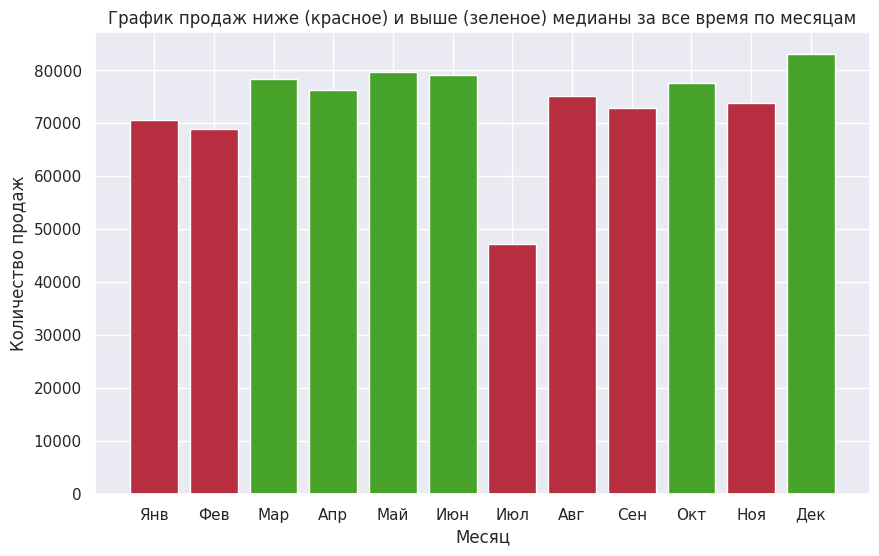

Доля месяцев с кол-вом продаж ниже медианы 75760.5: 50.00%
Доля месяцев с кол-вом продаж ниже средней 73584.58: 33.33%
Месяцы с продажами ниже медианы: [ 1  2  7  8  9 11]
Месяцы с продажами выше медианы: [ 3  4  5  6 10 12]


In [ ]:
median_number_of_sales_per_month = groupby_date['st_id'].median()
mean_number_of_sales_per_month = groupby_date['st_id'].mean()

groupby_date['color'] = np.where(groupby_date['st_id'] < median_number_of_sales_per_month, '#B62E40', '#46A229')



plt.figure(figsize=(10, 6))
plt.bar(groupby_date['month'], groupby_date['st_id'], color=groupby_date['color'])
plt.xlabel('Месяц')
plt.ylabel('Количество продаж')
plt.title('График продаж ниже (красное) и выше (зеленое) медианы за все время по месяцам')
plt.xticks(np.arange(1, 13), [
    'Янв', 'Фев', 'Мар', 'Апр', 'Май', 'Июн', 'Июл', 'Авг', 'Сен', 'Окт', 'Ноя', 'Дек'
])


plt.show()

low_sales_month_median = groupby_date[groupby_date['st_id'] < median_number_of_sales_per_month]
low_sales_fraction_median = len(low_sales_month_median) / len(groupby_date)

print(f'Доля месяцев с кол-вом продаж ниже медианы {round(median_number_of_sales_per_month,2)}: {low_sales_fraction_median:.2%}')
low_sales_month_mean = groupby_date[groupby_date['st_id'] < mean_number_of_sales_per_month]
low_sales_fraction_mean = len(low_sales_month_mean) / len(groupby_date)
print(f'Доля месяцев с кол-вом продаж ниже средней {round(mean_number_of_sales_per_month,2)}: {low_sales_fraction_mean:.2%}')
months_below_median = groupby_date[groupby_date['color'] == '#B62E40']['month'].unique()
months_above_median = groupby_date[groupby_date['color'] == '#46A229']['month'].unique()

print(f'Месяцы с продажами ниже медианы: {months_below_median}')
print(f'Месяцы с продажами выше медианы: {months_above_median}')


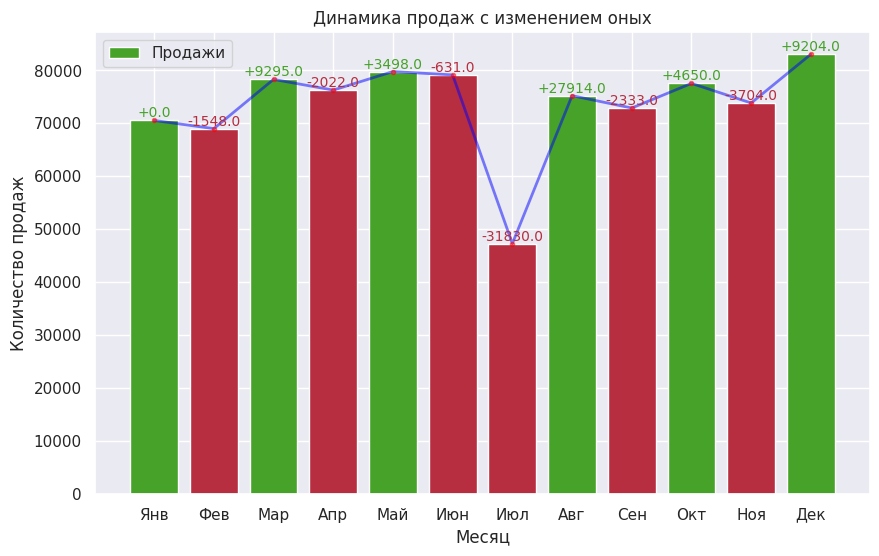

month  st_id    color  sales_change
0       1  70560  #46A229           0.0
1       2  69012  #B62E40       -1548.0
2       3  78307  #46A229        9295.0
3       4  76285  #B62E40       -2022.0
4       5  79783  #46A229        3498.0
5       6  79152  #B62E40        -631.0
6       7  47322  #B62E40      -31830.0
7       8  75236  #46A229       27914.0
8       9  72903  #B62E40       -2333.0
9      10  77553  #46A229        4650.0
10     11  73849  #B62E40       -3704.0
11     12  83053  #46A229        9204.0

Доля месяцев с количеством продаж ниже медианы 75760.5: 50.00%
Доля месяцев с количеством продаж ниже средней 73584.58: 33.33%
Месяцы с продажами ниже медианы: [ 2  4  6  7  9 11]
Месяцы с продажами выше медианы: [ 1  3  5  8 10 12]
Минимальное кол-во продаж в месяц 7 = 47322
Минимальное кол-во продаж в месяц 12 = 83053


In [ ]:
median_number_of_sales_per_month = groupby_date['st_id'].median()
mean_number_of_sales_per_month = groupby_date['st_id'].mean()
groupby_date['sales_change'] = groupby_date['st_id'].diff()
groupby_date['sales_change'].iloc[0] = 0
groupby_date['color'] = np.where(groupby_date['sales_change'] >= 0, '#46A229', '#B62E40')



plt.figure(figsize=(10, 6))
bars = plt.bar(groupby_date['month'], groupby_date['st_id'], color=groupby_date['color'], label='Продажи')
plt.xlabel('Месяц')
plt.ylabel('Количество продаж')
plt.title('Динамика продаж с изменением оных')
plt.xticks(np.arange(1, 13), [
    'Янв', 'Фев', 'Мар', 'Апр', 'Май', 'Июн', 'Июл', 'Авг', 'Сен', 'Окт', 'Ноя', 'Дек'
])
plt.legend()

plt.plot(
    groupby_date['month'], groupby_date['st_id'], marker='o', markersize=3, label='Изменение продаж',
    color='blue', linestyle='-', linewidth=2, markerfacecolor='red', markeredgecolor='red', alpha=0.5
)

for i, (bar, change) in enumerate(zip(bars, groupby_date['sales_change'])):
    height = bar.get_height()
    color = '#46A229' if i == 0 else ('#B62E40' if change < 0 else '#46A229')
    plt.text(
        bar.get_x() + bar.get_width() / 2, height + 10, f'{change:+}', ha='center', va='bottom', fontsize=10,
        color=color
    )



plt.show()

low_sales_month_median = groupby_date[groupby_date['st_id'] < median_number_of_sales_per_month]
low_sales_fraction_median = len(low_sales_month_median) / len(groupby_date)
display(groupby_date)
print(f'Доля месяцев с количеством продаж ниже медианы {round(median_number_of_sales_per_month,2)}: {low_sales_fraction_median:.2%}')
low_sales_month_mean = groupby_date[groupby_date['st_id'] < mean_number_of_sales_per_month]
low_sales_fraction_mean = len(low_sales_month_mean) / len(groupby_date)
print(f'Доля месяцев с количеством продаж ниже средней {round(mean_number_of_sales_per_month,2)}: {low_sales_fraction_mean:.2%}')

months_below_median = groupby_date[groupby_date['color'] == '#B62E40']['month'].unique()
months_above_median = groupby_date[groupby_date['color'] == '#46A229']['month'].unique()

print(f'Месяцы с продажами ниже медианы: {months_below_median}')
print(f'Месяцы с продажами выше медианы: {months_above_median}')
print(f'Минимальное кол-во продаж в месяц {groupby_date[groupby_date["st_id"]==groupby_date["st_id"].min()]["month"].values[0]} = {groupby_date["st_id"].min()}')
print(f'Минимальное кол-во продаж в месяц {groupby_date[groupby_date["st_id"]==groupby_date["st_id"].max()]["month"].values[0]} = {groupby_date["st_id"].max()}')

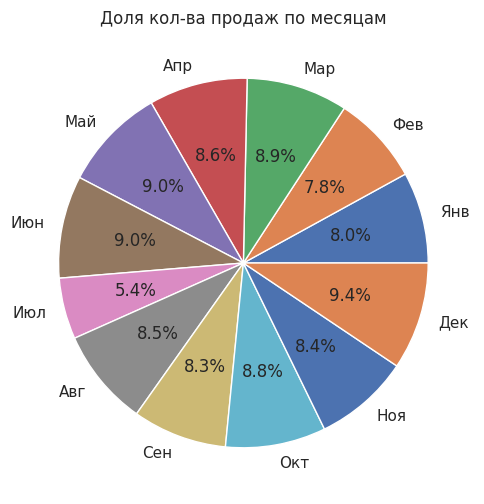

Янв - 8.0%
Фев - 7.8%
Мар - 8.9%
Апр - 8.6%
Май - 9.0%
Июн - 9.0%
Июл - 5.4%
Авг - 8.5%
Сен - 8.3%
Окт - 8.8%
Ноя - 8.4%
Дек - 9.4%
[8.0, 7.8, 8.9, 8.6, 9.0, 9.0, 5.4, 8.5, 8.3, 8.8, 8.4, 9.4]


In [ ]:

months = [
    'Янв', 'Фев', 'Мар', 'Апр', 'Май', 'Июн', 'Июл', 'Авг', 'Сен', 'Окт', 'Ноя', 'Дек'
]
sizes_ = groupby_date['st_id']
plt.figure(figsize=(10, 6))
_, _, autotexts = plt.pie(x=sizes_, labels=months, autopct='%1.1f%%')

plt.title('Доля кол-ва продаж по месяцам')
plt.show()
ratios = [float(autotext.get_text().strip('%')) for autotext in autotexts]



for i, month in enumerate(months):
    print(f'{month} - {ratios[i]:.1f}%')
print(ratios)

In [ ]:
groupby_date.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   month         12 non-null     int32  
 1   st_id         12 non-null     int64  
 2   color         12 non-null     object 
 3   sales_change  12 non-null     float64
dtypes: float64(1), int32(1), int64(1), object(1)
memory usage: 464.0+ bytes


In [ ]:
100 - (groupby_date[groupby_date['month']==7]['st_id'].values / groupby_date[groupby_date['month']==6]['st_id'].values * 100)

array([40.21376592])

In [ ]:
tmp = sales_df_train.copy()
groupby_date = tmp.groupby(['day_of_week']).count()['st_id']

In [ ]:
groupby_date = groupby_date.reset_index()

In [ ]:
groupby_date

day_of_week   st_id
0            0  116321
1            1  119589
2            2  119185
3            3  125114
4            4  138789
5            5  139385
6            6  124632

In [ ]:
median_number_of_sales_per_day_of_week = groupby_date['st_id'].median()

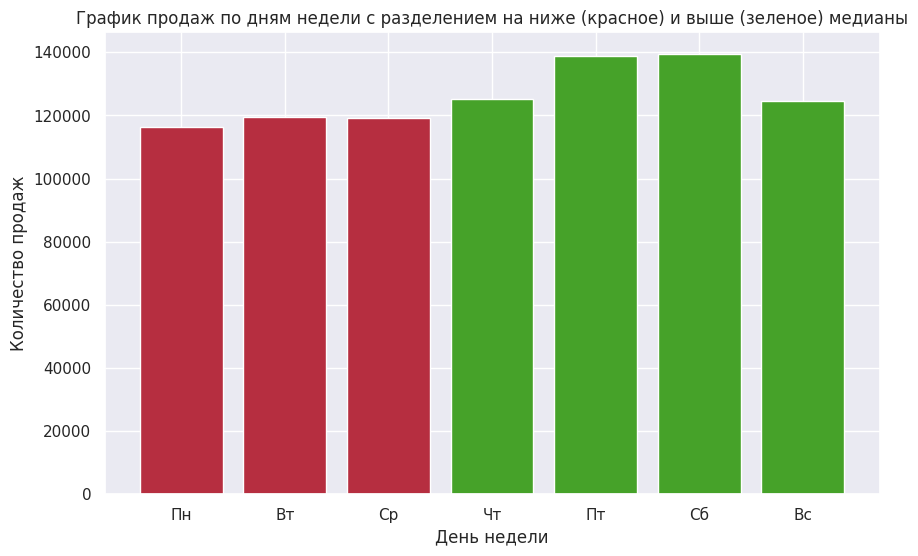

Дни недели с продажами ниже медианы: [0 1 2]
Дни недели с продажами выше медианы: [3 4 5 6]
Доля дней недели с количеством продаж ниже медианы 124632.0: 42.86%
День недели с минимальными  116321 продажами: 0
День недели с максимальными 139385 продажами: 5


In [ ]:
colors = np.where(groupby_date['st_id'] < median_number_of_sales_per_day_of_week, '#B62E40', '#46A229')

plt.figure(figsize=(10, 6))
plt.bar(groupby_date['day_of_week'], groupby_date['st_id'], color=colors)
plt.xlabel('День недели')
plt.ylabel('Количество продаж')
plt.title('График продаж по дням недели с разделением на ниже (красное) и выше (зеленое) медианы')
plt.xticks(range(7), ['Пн', 'Вт', 'Ср', 'Чт', 'Пт', 'Сб', 'Вс'])

plt.show()

low_sales_weekday = groupby_date[groupby_date['st_id'] < median_number_of_sales_per_day_of_week]
low_sales_fraction_weekday = len(low_sales_weekday) / len(groupby_date)
day_of_week_below_median = groupby_date[groupby_date['st_id'] < median_number_of_sales_per_day_of_week]['day_of_week'].values
day_of_week_above_median = groupby_date[groupby_date['st_id'] >= median_number_of_sales_per_day_of_week]['day_of_week'].values
print(f'Дни недели с продажами ниже медианы: {day_of_week_below_median}')
print(f'Дни недели с продажами выше медианы: {day_of_week_above_median}')
print(f'Доля дней недели с количеством продаж ниже медианы {round(median_number_of_sales_per_day_of_week, 2)}: {low_sales_fraction_weekday:.2%}')
print(f'День недели с минимальными  {groupby_date["st_id"].min()} продажами: {groupby_date[groupby_date["st_id"]==groupby_date["st_id"].min()]["day_of_week"].values[0]}')
print(f'День недели с максимальными {groupby_date["st_id"].max()} продажами: {groupby_date[groupby_date["st_id"]==groupby_date["st_id"].max()]["day_of_week"].values[0]}')

In [ ]:
tmp = sales_df_train.copy()
groupby_date = tmp.groupby(['season']).count()['st_id']

In [ ]:
groupby_date = groupby_date.reset_index()

In [ ]:
season_dict = {'Зима':0,'Весна':1,'Лето':2,'Осень':3}

In [ ]:
groupby_date['season']= groupby_date['season'].replace(season_dict)

In [ ]:
groupby_date = groupby_date.sort_values(by=
                         'season')

In [ ]:
sales_df_train['date'].min()

Timestamp('2022-08-01 00:00:00')

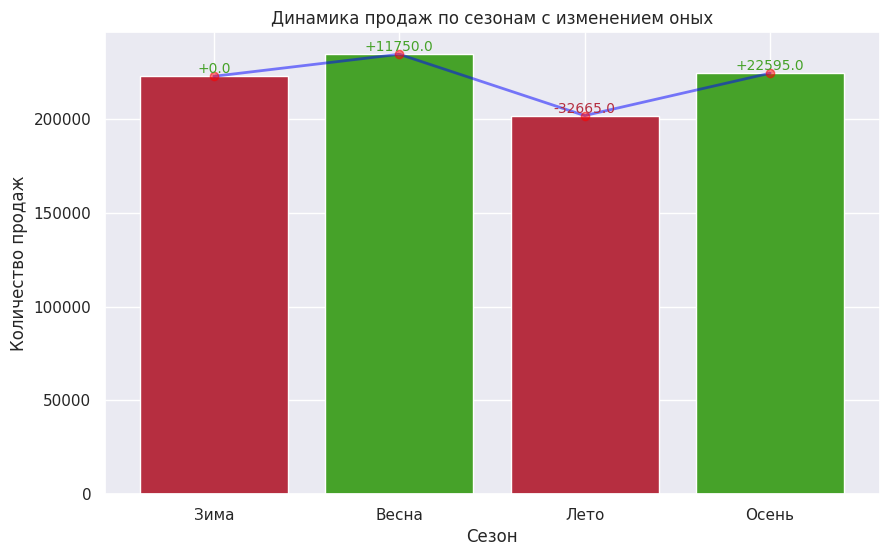

Доля сезонов с количеством продаж ниже медианы 223465.0: 50.00%
Сезоны с продажами ниже медианы: [0 2]
Сезоны с продажами выше медианы: [1 3]
Минимальное кол-во продаж в месяц 2 = 201710
Минимальное кол-во продаж в месяц 1 = 234375


In [ ]:
median_number_of_sales_per_month = groupby_date['st_id'].median()

colors = np.where(groupby_date['st_id'] < median_number_of_sales_per_month, '#B62E40', '#46A229')

plt.figure(figsize=(10, 6))
bars = plt.bar(groupby_date['season'], groupby_date['st_id'], color=colors)
plt.xlabel('Сезон')
plt.ylabel('Количество продаж')
plt.title('Динамика продаж по сезонам с изменением оных')
groupby_date['diff'] = groupby_date.st_id.diff()
groupby_date['diff'].iloc[0] = 0
plt.xticks(groupby_date['season'], ['Зима', 'Весна', 'Лето', 'Осень'])
for i, (bar, change) in enumerate(zip(bars, groupby_date['diff'])):
    height = bar.get_height()
    color = '#46A229' if i == 0 else ('#B62E40' if change < 0 else '#46A229')
    plt.text(
        bar.get_x() + bar.get_width() / 2, height + 10, f'{change:+}', ha='center', va='bottom', fontsize=10,
        color=color
    )

plt.plot(
    groupby_date['season'], groupby_date['st_id'], marker='o', markersize=6, label='Изменение продаж',
    color='blue', linestyle='-', linewidth=2, markerfacecolor='red', markeredgecolor='red', alpha=0.5
)

plt.show()

low_sales_season_median = groupby_date[groupby_date['st_id'] < median_number_of_sales_per_month]
low_sales_fraction_season_median = len(low_sales_season_median) / len(groupby_date)
print(f'Доля сезонов с количеством продаж ниже медианы {round(median_number_of_sales_per_month, 2)}: {low_sales_fraction_season_median:.2%}')

seasons_below_median = groupby_date[groupby_date['st_id'] < median_number_of_sales_per_month]['season'].values
seasons_above_median = groupby_date[groupby_date['st_id'] >= median_number_of_sales_per_month]['season'].values
print(f'Сезоны с продажами ниже медианы: {seasons_below_median}')
print(f'Сезоны с продажами выше медианы: {seasons_above_median}')
print(f'Минимальное кол-во продаж в месяц {groupby_date[groupby_date["st_id"]==groupby_date["st_id"].min()]["season"].values[0]} = {groupby_date["st_id"].min()}')
print(f'Минимальное кол-во продаж в месяц {groupby_date[groupby_date["st_id"]==groupby_date["st_id"].max()]["season"].values[0]} = {groupby_date["st_id"].max()}')


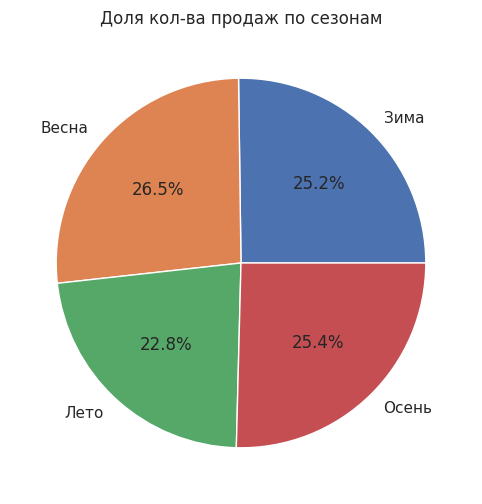

Зима - 25.2%
Весна - 26.5%
Лето - 22.8%
Осень - 25.4%
[25.2, 26.5, 22.8, 25.4]


In [ ]:
labels_ = list(season_dict.keys())



sizes_ = groupby_date['st_id']
plt.figure(figsize=(10, 6))
_, _, autotexts = plt.pie(x=sizes_, labels=labels_, autopct='%1.1f%%')

plt.title('Доля кол-ва продаж по сезонам')
plt.show()
ratios = [float(autotext.get_text().strip('%')) for autotext in autotexts]



for i, label in enumerate(labels_):
    print(f'{label} - {ratios[i]:.1f}%')
print(ratios)

In [ ]:
sales_df_train

st_id                         pr_sku_id  \
0       c81e728d9d4c2f636f067f89cc14862c  c7b711619071c92bef604c7ad68380dd   
1       42a0e188f5033bc65bf8d78622277c4e  68f441429e73dbd33b81f95da31576e9   
2       1ecfb463472ec9115b10c292ef8bc986  22988026fe85fde60d8bf777ab6bc3b4   
3       42a0e188f5033bc65bf8d78622277c4e  8e887cf8e64ab8e7173701a979476567   
4       16a5cdae362b8d27a1d8f8c7b78b4330  e6fc24ca846339d204b0b50e9f772484   
...                                  ...                               ...   
883010  c81e728d9d4c2f636f067f89cc14862c  a0150fefa71d6606d5e642fa0e7b8ad8   
883011  42a0e188f5033bc65bf8d78622277c4e  5b146d93f822459260216df28e572eca   
883012  42a0e188f5033bc65bf8d78622277c4e  c8bd18ea08d2f47cb0a7992f11ada9de   
883013  f7e6c85504ce6e82442c770f7c8606f0  b960c6ee5b5efa12e73f810204b561a8   
883014  16a5cdae362b8d27a1d8f8c7b78b4330  cff633e270708ced01bc585eb1421667   

             date  pr_sales_type_id  pr_sales_in_units  \
0      2022-10-20                 1                  5   
1      2023-01-29                 0                  4   
2      2023-03-02                 0                  1   
3      2023-04-05                 1                  0   
4      2023-02-17                 0                  1   
...           ...               ...                ...   
883010 2022-12-13                 1                  1   
883011 2023-04-18                 0                  1   
883012 2022-08-16                 0                  5   
883013 2023-04-23                 0                  4   
883014 2023-01-19                 0                  4   

        pr_promo_sales_in_units  pr_sales_in_rub  pr_promo_sales_in_rub  \
0                             5              825                    825   
1                             0              196                      0   
2                             0               78                      0   
3                             0               69                     69   
4                             0              161                      0   
...                         ...              ...                    ...   
883010                        1               33                     33   
883011                        0              192                      0   
883012                        0              970                      0   
883013                        0              262                      0   
883014                        0              225                      0   

        month  day_of_week season  
0          10            3  Осень  
1           1            6   Зима  
2           3            3  Весна  
3           4            2  Весна  
4           2            4   Зима  
...       ...          ...    ...  
883010     12            1   Зима  
883011      4            1  Весна  
883012      8            1   Лето  
883013      4            6  Весна  
883014      1            3   Зима  

[883015 rows x 11 columns]

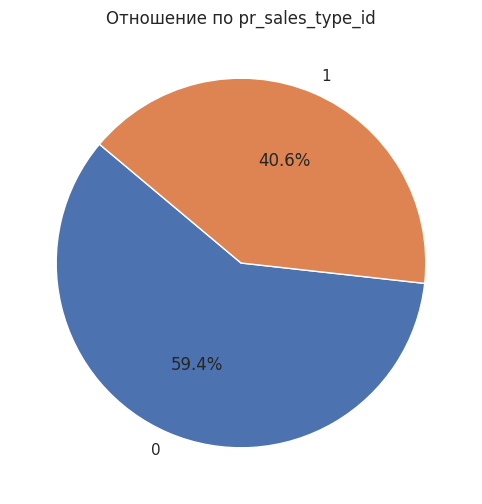

In [ ]:
pie_chart_2_var(sales_df_train,'pr_sales_type_id')

In [ ]:
sales_df_train.head()

st_id                         pr_sku_id  \
0  c81e728d9d4c2f636f067f89cc14862c  c7b711619071c92bef604c7ad68380dd   
1  42a0e188f5033bc65bf8d78622277c4e  68f441429e73dbd33b81f95da31576e9   
2  1ecfb463472ec9115b10c292ef8bc986  22988026fe85fde60d8bf777ab6bc3b4   
3  42a0e188f5033bc65bf8d78622277c4e  8e887cf8e64ab8e7173701a979476567   
4  16a5cdae362b8d27a1d8f8c7b78b4330  e6fc24ca846339d204b0b50e9f772484   

        date  pr_sales_type_id  pr_sales_in_units  pr_promo_sales_in_units  \
0 2022-10-20                 1                  5                        5   
1 2023-01-29                 0                  4                        0   
2 2023-03-02                 0                  1                        0   
3 2023-04-05                 1                  0                        0   
4 2023-02-17                 0                  1                        0   

   pr_sales_in_rub  pr_promo_sales_in_rub  month  day_of_week season  
0              825                    825     10            3  Осень  
1              196                      0      1            6   Зима  
2               78                      0      3            3  Весна  
3               69                     69      4            2  Весна  
4              161                      0      2            4   Зима

In [ ]:
sales_df_train[sales_df_train['pr_sales_in_rub']<0].shape

(78, 11)

In [ ]:
numeric_columns =list(sales_df_train.columns[4:8])

In [ ]:
numeric_columns

['pr_sales_in_units',
 'pr_promo_sales_in_units',
 'pr_sales_in_rub',
 'pr_promo_sales_in_rub']

In [ ]:
def boxplot_foo_subplot(data, x_column, y_column, title, ylim_=None, ylim_flag=False, dot_color='forestgreen', dot_alpha=0.3, dot_size=4, stripplot_=False, outliers=False):
    sns.set(style='darkgrid')

    plt.subplot(2, 2, i + 1)

    if outliers:
        sns.boxplot(data=data, x=x_column, y=y_column)
    else:
        sns.boxplot(data=data, x=x_column, y=y_column, whis=np.inf)

    if ylim_flag:
        plt.ylim(ylim_)

    if stripplot_:
        sns.stripplot(data=data, x=x_column, y=y_column, color=dot_color, alpha=dot_alpha, size=dot_size)

    plt.title(title)

In [ ]:
numeric_columns

['pr_sales_in_units',
 'pr_promo_sales_in_units',
 'pr_sales_in_rub',
 'pr_promo_sales_in_rub']

In [ ]:
sales_df_train

st_id                         pr_sku_id  \
0       c81e728d9d4c2f636f067f89cc14862c  c7b711619071c92bef604c7ad68380dd   
1       42a0e188f5033bc65bf8d78622277c4e  68f441429e73dbd33b81f95da31576e9   
2       1ecfb463472ec9115b10c292ef8bc986  22988026fe85fde60d8bf777ab6bc3b4   
3       42a0e188f5033bc65bf8d78622277c4e  8e887cf8e64ab8e7173701a979476567   
4       16a5cdae362b8d27a1d8f8c7b78b4330  e6fc24ca846339d204b0b50e9f772484   
...                                  ...                               ...   
883010  c81e728d9d4c2f636f067f89cc14862c  a0150fefa71d6606d5e642fa0e7b8ad8   
883011  42a0e188f5033bc65bf8d78622277c4e  5b146d93f822459260216df28e572eca   
883012  42a0e188f5033bc65bf8d78622277c4e  c8bd18ea08d2f47cb0a7992f11ada9de   
883013  f7e6c85504ce6e82442c770f7c8606f0  b960c6ee5b5efa12e73f810204b561a8   
883014  16a5cdae362b8d27a1d8f8c7b78b4330  cff633e270708ced01bc585eb1421667   

             date  pr_sales_type_id  pr_sales_in_units  \
0      2022-10-20                 1                  5   
1      2023-01-29                 0                  4   
2      2023-03-02                 0                  1   
3      2023-04-05                 1                  0   
4      2023-02-17                 0                  1   
...           ...               ...                ...   
883010 2022-12-13                 1                  1   
883011 2023-04-18                 0                  1   
883012 2022-08-16                 0                  5   
883013 2023-04-23                 0                  4   
883014 2023-01-19                 0                  4   

        pr_promo_sales_in_units  pr_sales_in_rub  pr_promo_sales_in_rub  \
0                             5              825                    825   
1                             0              196                      0   
2                             0               78                      0   
3                             0               69                     69   
4                             0              161                      0   
...                         ...              ...                    ...   
883010                        1               33                     33   
883011                        0              192                      0   
883012                        0              970                      0   
883013                        0              262                      0   
883014                        0              225                      0   

        month  day_of_week season  
0          10            3  Осень  
1           1            6   Зима  
2           3            3  Весна  
3           4            2  Весна  
4           2            4   Зима  
...       ...          ...    ...  
883010     12            1   Зима  
883011      4            1  Весна  
883012      8            1   Лето  
883013      4            6  Весна  
883014      1            3   Зима  

[883015 rows x 11 columns]

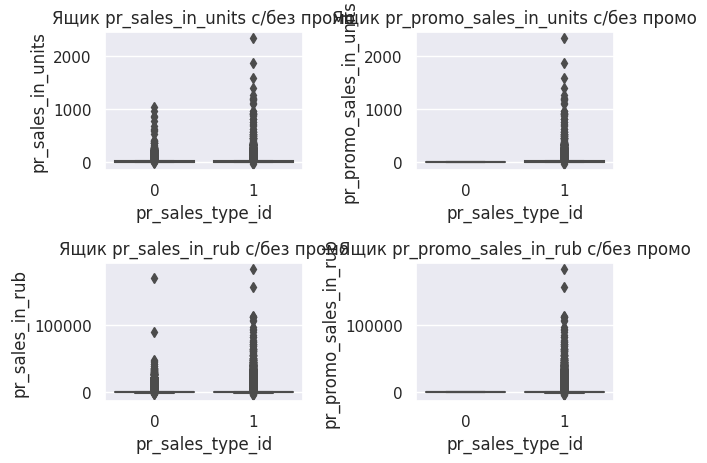

In [ ]:


for i, col in enumerate(numeric_columns):
    plt.subplot(2, 2, i + 1)
    boxplot_foo_subplot(sales_df_train, 'pr_sales_type_id', col, title=f'Ящик {col} с/без промо', outliers=True)

plt.tight_layout()
plt.show()

In [ ]:
sales_df_train[sales_df_train['pr_sales_in_rub'] > 10000]['pr_sales_in_units'].value_counts().reset_index().sort_values(by='pr_sales_in_units')

pr_sales_in_units  count
337                  8      1
230                  9      2
200                 10      3
165                 11      5
127                 12     11
..                 ...    ...
276               1271      1
321               1400      1
234               1596      1
317               1872      1
350               2348      1

[359 rows x 2 columns]

In [ ]:
sales_df_train[((sales_df_train['pr_sales_in_rub'] > 10000) & (sales_df_train['pr_sales_in_units']<20))]

st_id                         pr_sku_id  \
7271    c81e728d9d4c2f636f067f89cc14862c  63fd103c3678af110f183d7d499d0081   
8039    c81e728d9d4c2f636f067f89cc14862c  480c8cfe6acee2ea1d6f1c63bb80f226   
12624   16a5cdae362b8d27a1d8f8c7b78b4330  4a04104f09c6ea3e807666cce0c294d5   
27022   16a5cdae362b8d27a1d8f8c7b78b4330  f9913de6246f7b1d28d51261c268f0ae   
30491   c81e728d9d4c2f636f067f89cc14862c  df86a6e432abafd11f1bfd355494b0e4   
...                                  ...                               ...   
834819  c81e728d9d4c2f636f067f89cc14862c  a70a600d7c593ca50cc6639cd64ed71a   
837250  c81e728d9d4c2f636f067f89cc14862c  a70a600d7c593ca50cc6639cd64ed71a   
842679  c81e728d9d4c2f636f067f89cc14862c  17e0ce48c87a8885fe8b82c21cb17ecf   
850111  16a5cdae362b8d27a1d8f8c7b78b4330  4e824a65fbd01f1708131bd247842688   
869496  16a5cdae362b8d27a1d8f8c7b78b4330  4e824a65fbd01f1708131bd247842688   

             date  pr_sales_type_id  pr_sales_in_units  \
7271   2022-12-27                 0                 12   
8039   2022-11-26                 1                 10   
12624  2022-08-25                 1                 18   
27022  2022-12-29                 1                 17   
30491  2022-12-30                 1                 18   
...           ...               ...                ...   
834819 2023-06-02                 0                  9   
837250 2022-12-30                 1                 16   
842679 2022-12-17                 0                 14   
850111 2022-08-30                 1                 19   
869496 2022-09-08                 1                 19   

        pr_promo_sales_in_units  pr_sales_in_rub  pr_promo_sales_in_rub  \
7271                          0            10155                      0   
8039                         10            10473                  10473   
12624                        18            11287                  11287   
27022                        17            13326                  13326   
30491                        18            13064                  13064   
...                         ...              ...                    ...   
834819                        0            10155                      0   
837250                       16            11600                  11600   
842679                        0            11760                      0   
850111                       19            11840                  11840   
869496                       19            11805                  11805   

        month  day_of_week season  
7271       12            1   Зима  
8039       11            5  Осень  
12624       8            3   Лето  
27022      12            3   Зима  
30491      12            4   Зима  
...       ...          ...    ...  
834819      6            4   Лето  
837250     12            4   Зима  
842679     12            5   Зима  
850111      8            1   Лето  
869496      9            3  Осень  

[108 rows x 11 columns]

In [ ]:

pr_st = pd.read_csv('/kaggle/input/lenta-hack/st_df.csv')

In [ ]:
pr_st['st_is_active'].value_counts()/pr_st['st_is_active'].value_counts().sum()

st_is_active
1    0.833333
0    0.166667
Name: count, dtype: float64

In [ ]:
pr_st_active_only = pr_st.copy()

In [ ]:
pr_st_active_only = pr_st_active_only[pr_st_active_only['st_is_active']==1].reset_index(drop=True)

In [ ]:
pr_st_active_only.columns

Index(['st_id', 'st_city_id', 'st_division_code', 'st_type_format_id',
       'st_type_loc_id', 'st_type_size_id', 'st_is_active'],
      dtype='object')

In [ ]:
pr_st_active_only.shape

(10, 7)

In [ ]:
pr_df.columns

Index(['pr_sku_id', 'pr_group_id', 'pr_cat_id', 'pr_subcat_id', 'pr_uom_id'], dtype='object')

In [ ]:
pr_st_active_only.shape

(10, 7)

In [ ]:
pr_df.shape

(2050, 5)

In [ ]:
sales_df_train.columns

Index(['st_id', 'pr_sku_id', 'date', 'pr_sales_type_id', 'pr_sales_in_units',
       'pr_promo_sales_in_units', 'pr_sales_in_rub', 'pr_promo_sales_in_rub',
       'month', 'day_of_week', 'season'],
      dtype='object')

In [ ]:
sales_df_train.shape

(883015, 11)

# Объединение таблиц

In [ ]:
merged_df = sales_df_train.merge(pr_df, on='pr_sku_id', how='left')


In [ ]:
final_merged = merged_df.merge(pr_st_active_only, on='st_id', how='left')


In [ ]:
final_merged.isna().sum()

st_id                        0
pr_sku_id                    0
date                         0
pr_sales_type_id             0
pr_sales_in_units            0
pr_promo_sales_in_units      0
pr_sales_in_rub              0
pr_promo_sales_in_rub        0
month                        0
day_of_week                  0
season                       0
pr_group_id                  0
pr_cat_id                    0
pr_subcat_id                 0
pr_uom_id                    0
st_city_id                 729
st_division_code           729
st_type_format_id          729
st_type_loc_id             729
st_type_size_id            729
st_is_active               729
dtype: int64

In [ ]:
final_merged.shape

(883015, 21)

729 - это данные для неактивных магазинов. Можем удалять смело.

In [ ]:
final_merged.dropna(inplace=True,ignore_index=True)

In [ ]:
final_merged.shape

(882286, 21)

In [ ]:
final_merged.isna().sum()

st_id                      0
pr_sku_id                  0
date                       0
pr_sales_type_id           0
pr_sales_in_units          0
pr_promo_sales_in_units    0
pr_sales_in_rub            0
pr_promo_sales_in_rub      0
month                      0
day_of_week                0
season                     0
pr_group_id                0
pr_cat_id                  0
pr_subcat_id               0
pr_uom_id                  0
st_city_id                 0
st_division_code           0
st_type_format_id          0
st_type_loc_id             0
st_type_size_id            0
st_is_active               0
dtype: int64

# Добаволяем признаки

In [ ]:
holidays_csv = pd.read_csv('/kaggle/input/holidays/holidays_covid_calendar.csv')

In [ ]:
holiday_dict = {1:[i for i in range(1,10)],
2:[23],
3:[8],
5:[1,9],
6:[12],
11:[4],
12:[31]}

In [ ]:
def set_flag_holiday(row, holiday_dict):
    '''
    Функция размечает даты - праздник / не праздник
    :param row: Таблица
    :param holiday_dct: Словарь месяц:[число(1),...,число(i)]
    '''

    month = row['month']
    day = row['date'].day
    if month in holiday_dict and day in holiday_dict[month]:
        return 1
    return 0



In [ ]:
final_merged['holiday'] = final_merged.apply(lambda row: set_flag_holiday(row, holiday_dict), axis=1)


In [ ]:
final_merged = final_merged.sort_values(by='date')

In [ ]:
tmp=final_merged.copy()

In [ ]:
unique_rec= tmp.drop_duplicates(subset=['date'])

unique_rec.reset_index(drop=False,inplace=True)

In [ ]:
def after_holidays_n_days(row, n_before):
    if row['holiday'] == 1:
        return 1
    for i in range(1, n_before + 1):
        if row.name - i < 0:
            break
        if unique_rec.at[row.name - i, 'holiday'] == 1:
            return 1
    return 0

def before_holidays_n_days(row, n_after):
    if row['holiday'] == 1:
        return 1
    for i in range(1, n_after + 1):
        if row.name + i >= len(unique_rec):
            break
        if unique_rec.at[row.name + i, 'holiday'] == 1:
            return 1
    return 0


In [ ]:
n_before = 14  # Количество дней до и после праздника
unique_rec['before_holidays_n_days'] = unique_rec.apply(lambda row: before_holidays_n_days(row, n_before), axis=1)


In [ ]:
n_after= 7
unique_rec['after_holidays_n_days'] = unique_rec.apply(lambda row: after_holidays_n_days(row, n_after), axis=1)


In [ ]:
before_after_day = unique_rec.loc[:,['date','before_holidays_n_days','after_holidays_n_days']]

In [ ]:
final_merged = final_merged.merge(before_after_day, on='date', how='left')


In [ ]:
def cos_sin_categorise(data,cos_column_name,sin_column_name,column_to_categorise):
    """
    Применяет cos-sin тригонометрическую категоризацию

    :param data: DataFrame содержащий данные
    :param cos_column_name: Название будущей колонки с cos
    :param sin_column_name: Название будущей колонки с sin
    :param column_to_categorise: Назване колонки, которое хотим категоризовать
    """
    data[cos_column_name] = np.cos((2*np.pi *data[column_to_categorise])/data[column_to_categorise].nunique())
    data[sin_column_name] = np.sin((2*np.pi *data[column_to_categorise])/data[column_to_categorise].nunique())

In [ ]:
final_merged['year'] = final_merged['date'].dt.year
final_merged['day'] =final_merged['date'].dt.day

In [ ]:
final_merged.columns

Index(['st_id', 'pr_sku_id', 'date', 'pr_sales_type_id', 'pr_sales_in_units',
       'pr_promo_sales_in_units', 'pr_sales_in_rub', 'pr_promo_sales_in_rub',
       'month', 'day_of_week', 'season', 'pr_group_id', 'pr_cat_id',
       'pr_subcat_id', 'pr_uom_id', 'st_city_id', 'st_division_code',
       'st_type_format_id', 'st_type_loc_id', 'st_type_size_id',
       'st_is_active', 'holiday', 'before_holidays_n_days',
       'after_holidays_n_days', 'year', 'day'],
      dtype='object')

In [ ]:
season_mapping = {'Зима': 0, 'Весна': 1, 'Лето': 2, 'Осень': 3}

# Заменяем значения в столбце 'season' согласно словарю
final_merged['season'] = final_merged['season'].replace(season_mapping)

In [ ]:
cos_sin_columns = ['season','month','day_of_week','day']

In [ ]:
for i in cos_sin_columns:
    cos_sin_categorise(final_merged,f'cos_{i}',f'sin_{i}',i)

In [ ]:
final_merged.head(2).T

0  \
st_id                    f7e6c85504ce6e82442c770f7c8606f0   
pr_sku_id                f152516615efd05cf4b4903b03d4a45d   
date                                  2022-08-01 00:00:00   
pr_sales_type_id                                        0   
pr_sales_in_units                                       3   
pr_promo_sales_in_units                                 0   
pr_sales_in_rub                                       272   
pr_promo_sales_in_rub                                   0   
month                                                   8   
day_of_week                                             0   
season                                                  2   
pr_group_id              aab3238922bcc25a6f606eb525ffdc56   
pr_cat_id                28fc2782ea7ef51c1104ccf7b9bea13d   
pr_subcat_id             b9d194b4fcd411b02eea6fe9f66bf427   
pr_uom_id                                               1   
st_city_id               3202111cf90e7c816a472aaceb72b0df   
st_division_code         32586311f16876abf92901085bd87b99   
st_type_format_id                                     1.0   
st_type_loc_id                                        1.0   
st_type_size_id                                      12.0   
st_is_active                                          1.0   
holiday                                                 0   
before_holidays_n_days                                  0   
after_holidays_n_days                                   0   
year                                                 2022   
day                                                     1   
cos_season                                           -1.0   
sin_season                                            0.0   
cos_month                                            -0.5   
sin_month                                       -0.866025   
cos_day_of_week                                       1.0   
sin_day_of_week                                       0.0   
cos_day                                           0.97953   
sin_day                                          0.201299   

                                                        1  
st_id                    53e19f3dbb211f20b20b45668303c1b6  
pr_sku_id                c094d01a05c16145a507b8a2b840a4f0  
date                                  2022-08-01 00:00:00  
pr_sales_type_id                                        0  
pr_sales_in_units                                       3  
pr_promo_sales_in_units                                 0  
pr_sales_in_rub                                        98  
pr_promo_sales_in_rub                                   0  
month                                                   8  
day_of_week                                             0  
season                                                  2  
pr_group_id              c74d97b01eae257e44aa9d5bade97baf  
pr_cat_id                1bc0249a6412ef49b07fe6f62e6dc8de  
pr_subcat_id             ca34f669ae367c87f0e75dcae0f61ee5  
pr_uom_id                                              17  
st_city_id               955d864a62659945cc9434898e275deb  
st_division_code         e26072c92d8fe0738df44d571d5f5e8b  
st_type_format_id                                     4.0  
st_type_loc_id                                        3.0  
st_type_size_id                                      20.0  
st_is_active                                          1.0  
holiday                                                 0  
before_holidays_n_days                                  0  
after_holidays_n_days                                   0  
year                                                 2022  
day                                                     1  
cos_season                                           -1.0  
sin_season                                            0.0  
cos_month                                            -0.5  
sin_month                                       -0.866025  
cos_day_of_week                                       1.0  


In [ ]:
final_merged['pr_sku_id'].nunique()

1991

In [ ]:
final_merged_filter= final_merged[final_merged['pr_sales_in_units']>0]

In [ ]:
final_merged_filter

st_id                         pr_sku_id  \
0       f7e6c85504ce6e82442c770f7c8606f0  f152516615efd05cf4b4903b03d4a45d   
1       53e19f3dbb211f20b20b45668303c1b6  c094d01a05c16145a507b8a2b840a4f0   
2       f7e6c85504ce6e82442c770f7c8606f0  7a5ebc8af2689363da125308abe00d7f   
3       c81e728d9d4c2f636f067f89cc14862c  e79eb35132023b80bd8610a4ee16e52d   
4       1ecfb463472ec9115b10c292ef8bc986  5f86639bbaacbed711e89635b602cc75   
...                                  ...                               ...   
882281  16a5cdae362b8d27a1d8f8c7b78b4330  65b549322da3ee58ae90de15c61b62ae   
882282  42a0e188f5033bc65bf8d78622277c4e  fe5d18ae6650335830e4c1dbd9e6ddb9   
882283  f7e6c85504ce6e82442c770f7c8606f0  f97121dd421dc1097ff63dd6e237c2cb   
882284  fa7cdfad1a5aaf8370ebeda47a1ff1c3  bd78bd39035162d425a5c8ac8b088fc6   
882285  fa7cdfad1a5aaf8370ebeda47a1ff1c3  2bd31c7c54bbd12554730ae254c428b1   

             date  pr_sales_type_id  pr_sales_in_units  \
0      2022-08-01                 0                  3   
1      2022-08-01                 0                  3   
2      2022-08-01                 0                 12   
3      2022-08-01                 0                  1   
4      2022-08-01                 0                  2   
...           ...               ...                ...   
882281 2023-07-18                 0                  2   
882282 2023-07-18                 0                  2   
882283 2023-07-18                 1                  1   
882284 2023-07-18                 0                  4   
882285 2023-07-18                 0                  2   

        pr_promo_sales_in_units  pr_sales_in_rub  pr_promo_sales_in_rub  \
0                             0              272                      0   
1                             0               98                      0   
2                             0              650                      0   
3                             0              376                      0   
4                             0              128                      0   
...                         ...              ...                    ...   
882281                        0               39                      0   
882282                        0              195                      0   
882283                        1              190                    190   
882284                        0              516                      0   
882285                        0               39                      0   

        month  day_of_week  ...  year day cos_season    sin_season  cos_month  \
0           8            0  ...  2022   1       -1.0  1.224647e-16  -0.500000   
1           8            0  ...  2022   1       -1.0  1.224647e-16  -0.500000   
2           8            0  ...  2022   1       -1.0  1.224647e-16  -0.500000   
3           8            0  ...  2022   1       -1.0  1.224647e-16  -0.500000   
4           8            0  ...  2022   1       -1.0  1.224647e-16  -0.500000   
...       ...          ...  ...   ...  ..        ...           ...        ...   
882281      7            1  ...  2023  18       -1.0  1.224647e-16  -0.866025   
882282      7            1  ...  2023  18       -1.0  1.224647e-16  -0.866025   
882283      7            1  ...  2023  18       -1.0  1.224647e-16  -0.866025   
882284      7            1  ...  2023  18       -1.0  1.224647e-16  -0.866025   
882285      7            1  ...  2023  18       -1.0  1.224647e-16  -0.866025   

       sin_month cos_day_of_week  sin_day_of_week   cos_day   sin_day  
0      -0.866025         1.00000         0.000000  0.979530  0.201299  
1      -0.866025         1.00000         0.000000  0.979530  0.201299  
2      -0.866025         1.00000         0.000000  0.979530  0.201299  
3      -0.866025         1.00000         0.000000  0.979530  0.201299  
4      -0.866025         1.00000         0.000000  0.979530  0.201299  
...          ...             ...              ...       ...       ...  
882281 -0.500000       